# Projekt z uczenia maszynowego związanym w wykrywaniem chorób serca

### Paweł Wira 245725

Zbiór danych zaczęrpnięty ze strony "https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction?datasetId=1582403&sortBy=voteCount"

# 1.Wprowadzenie

W pogoni za karierą wiele ludzi nie zdaje sobie sprawy jak ważny jest zdrowy tryb życia, którego brak niesie za sobą wiele przykrych konskekwencji,
które mogą skończyć się dla nich tragicznie. Brak aktywności fizycznej (siedzący tryb życia), imprezowy tryb życia (używki), niezdrowa dieta związana z tłuszami utwardzanymi i białym cukrem czy zaniedbywanie okresowych badań to tylko niektóre powody, których konsekwencją może być wiele chorób a jednymi z nich są choroby 
związane z najważniejszym organem w ciele człowieka, odpowiedzialnym za pompowanie krwi do innych narządów czyli sercem. 

Choroby serca zaburzają cały układ krążenia, a ryzyko ich powstawania wzrasta wraz z wiekiem. Możemy wymienić min. takie wady jak: 
- choroba niedokrwienna serca (choroba wieńcowa), 

- choroba niedokrwienna serca (choroba wieńcowa), 

- niewydolność mięśnia sercowego (ostra, przewlekła),

- blok przewodnictwa przedsionkowo-komorowego,

- zapalenie mięśnia sercowego,

- zapalenie osierdzia lub wsierdzia,

- wady zastawkowe,

- nerwica serca.

Główną motywacją do stworzenia programu było nasze zdrowie i próba wcześniejszego przewidzenia chorób serca, która może mieć bezpośredni związek z innymi parametrami pracy naszego organizmu.

# 2. Import bibliotek oraz bazy danych wraz z jej początkowym zrozumieniem

Na początku pisania programu zostaną zaczęrpnięte bilbioteki niezbędne do wizualizacji danych oraz implementacji algorytmów uczenia maszynowego. Następnie dane zostaną zwizualizowane pod względem typu, niektóre z nich mogą wymagać zamiany ich rodzaju.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, confusion_matrix, roc_curve, auc, average_precision_score, plot_precision_recall_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
dt = pd.read_csv("../Heart_Failure_Prediction/Heart_Failure.csv")
print('Ilość kolumn',dt.shape[0], 'Ilość wierszy ',dt.shape[1])

Ilość kolumn 918 Ilość wierszy  12


In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
dt = dt.replace("M", 1)
dt = dt.replace("F", 2)

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 86.2+ KB


In [6]:
number = preprocessing.LabelEncoder()
dt["ChestPainType"] = number.fit_transform(dt["ChestPainType"])
dt["RestingECG"] = number.fit_transform(dt["RestingECG"])
dt["ExerciseAngina"] = number.fit_transform(dt["ExerciseAngina"])
dt["ST_Slope"] = number.fit_transform(dt["ST_Slope"])

In [7]:
dt.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,2,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,2,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [8]:
dt[dt.duplicated()]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


# 3. Wizualizacja Danych

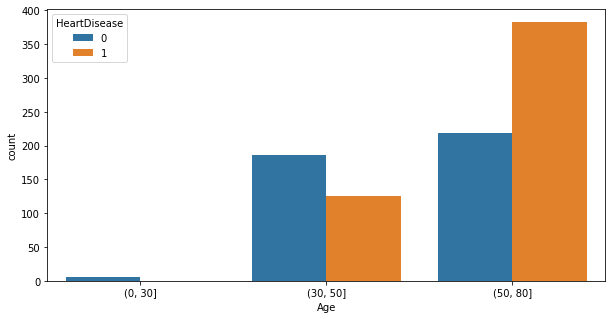

In [9]:
plt.figure(figsize=(10,5))
bins=[0,30,50,80]
sns.countplot(x=pd.cut(dt.Age,bins=bins),hue=dt.HeartDisease)
plt.show()

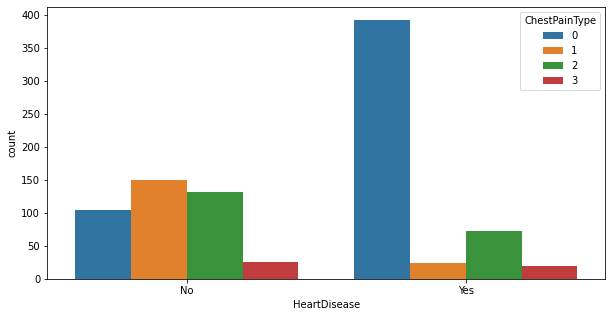

In [10]:
plt.figure(figsize=(10,5))
sns.countplot(x=dt.HeartDisease,hue=dt.ChestPainType)
plt.xticks(np.arange(2), ['No', 'Yes']) 
plt.show()

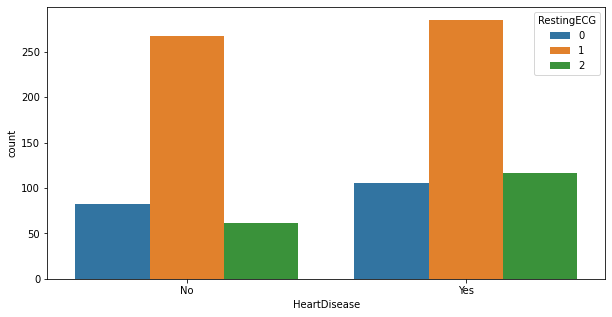

In [11]:
plt.figure(figsize=(10,5))
sns.countplot(x=dt.HeartDisease,hue=dt.RestingECG)
plt.xticks(np.arange(2), ['No', 'Yes']) 
plt.show()

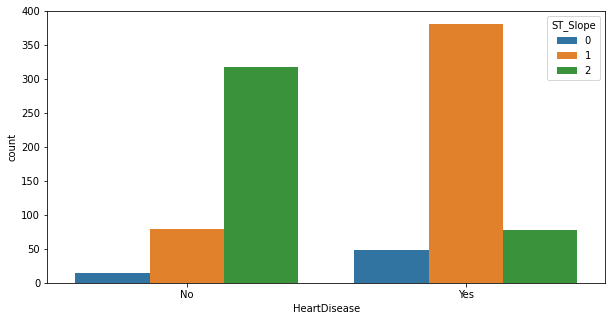

In [12]:
plt.figure(figsize=(10,5))
sns.countplot(x=dt.HeartDisease,hue=dt.ST_Slope)
plt.xticks(np.arange(2), ['No', 'Yes']) 
plt.show()

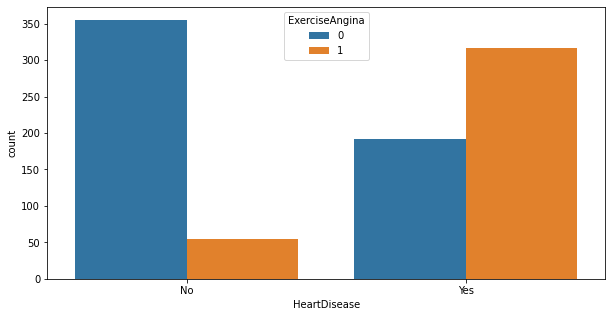

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(x=dt.HeartDisease,hue=dt.ExerciseAngina)
plt.xticks(np.arange(2), ['No', 'Yes']) 
plt.show()

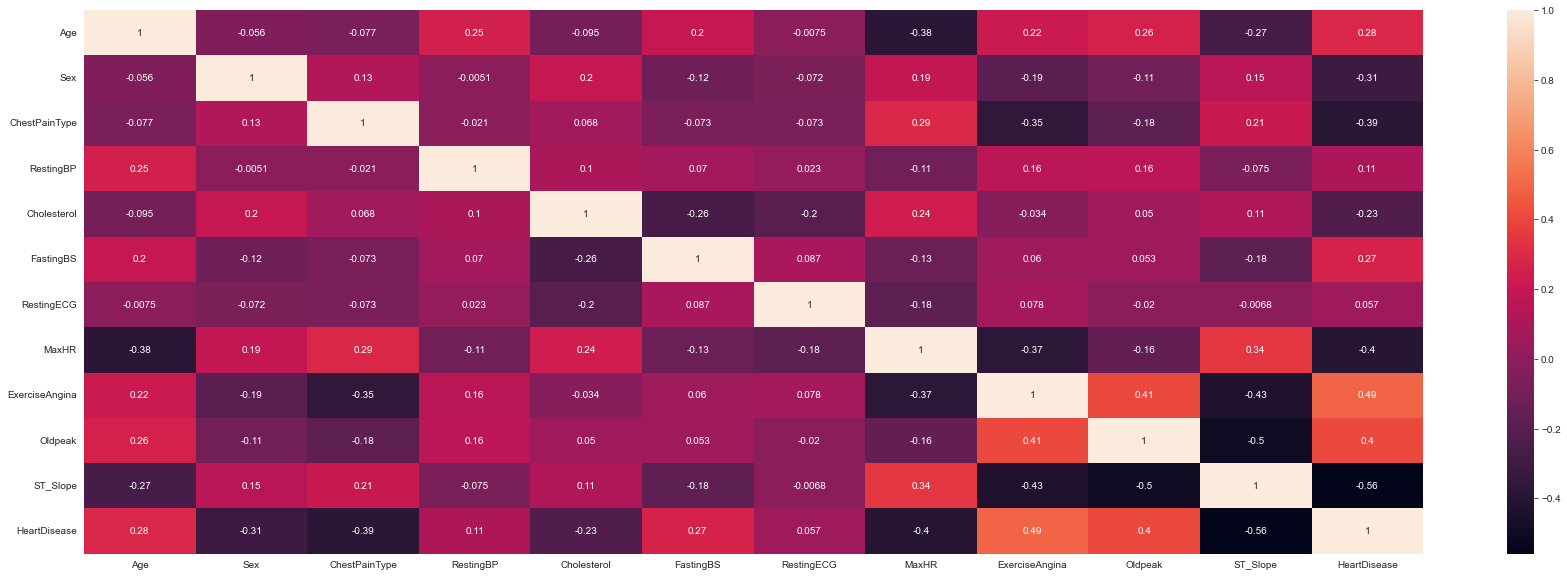

In [14]:
plt.figure(figsize= (30,10))
sns.set_style("darkgrid")
sns.heatmap(dt.corr(),annot= True)
plt.show()

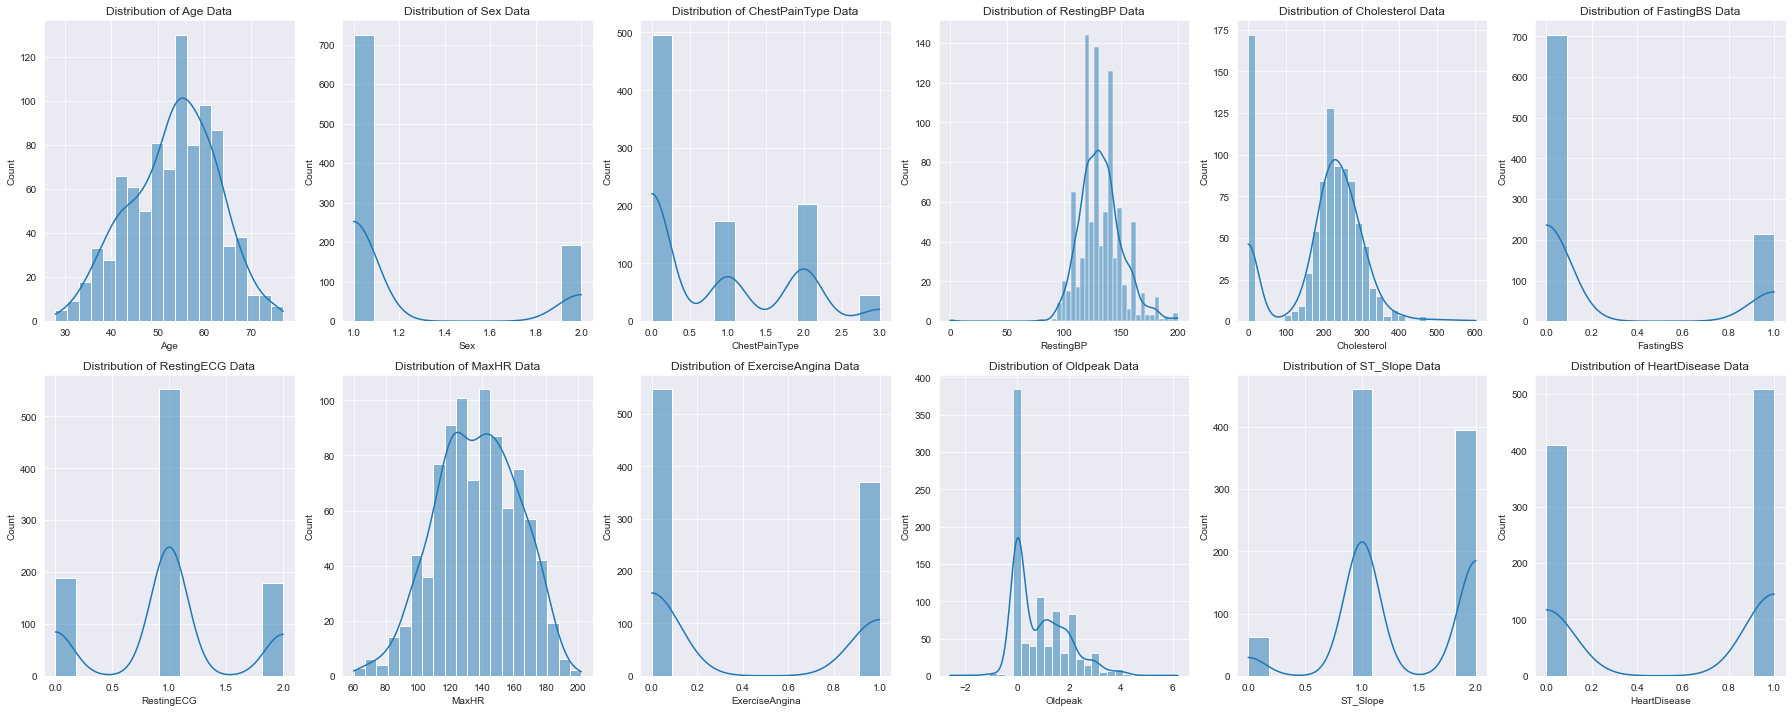

In [15]:
plt.figure(figsize=(25,10))
for i,col in enumerate(dt.columns,1):
    plt.subplot(2,6,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(dt[col],kde=True)
    plt.tight_layout()
    plt.plot()
    

<Figure size 72x72 with 0 Axes>

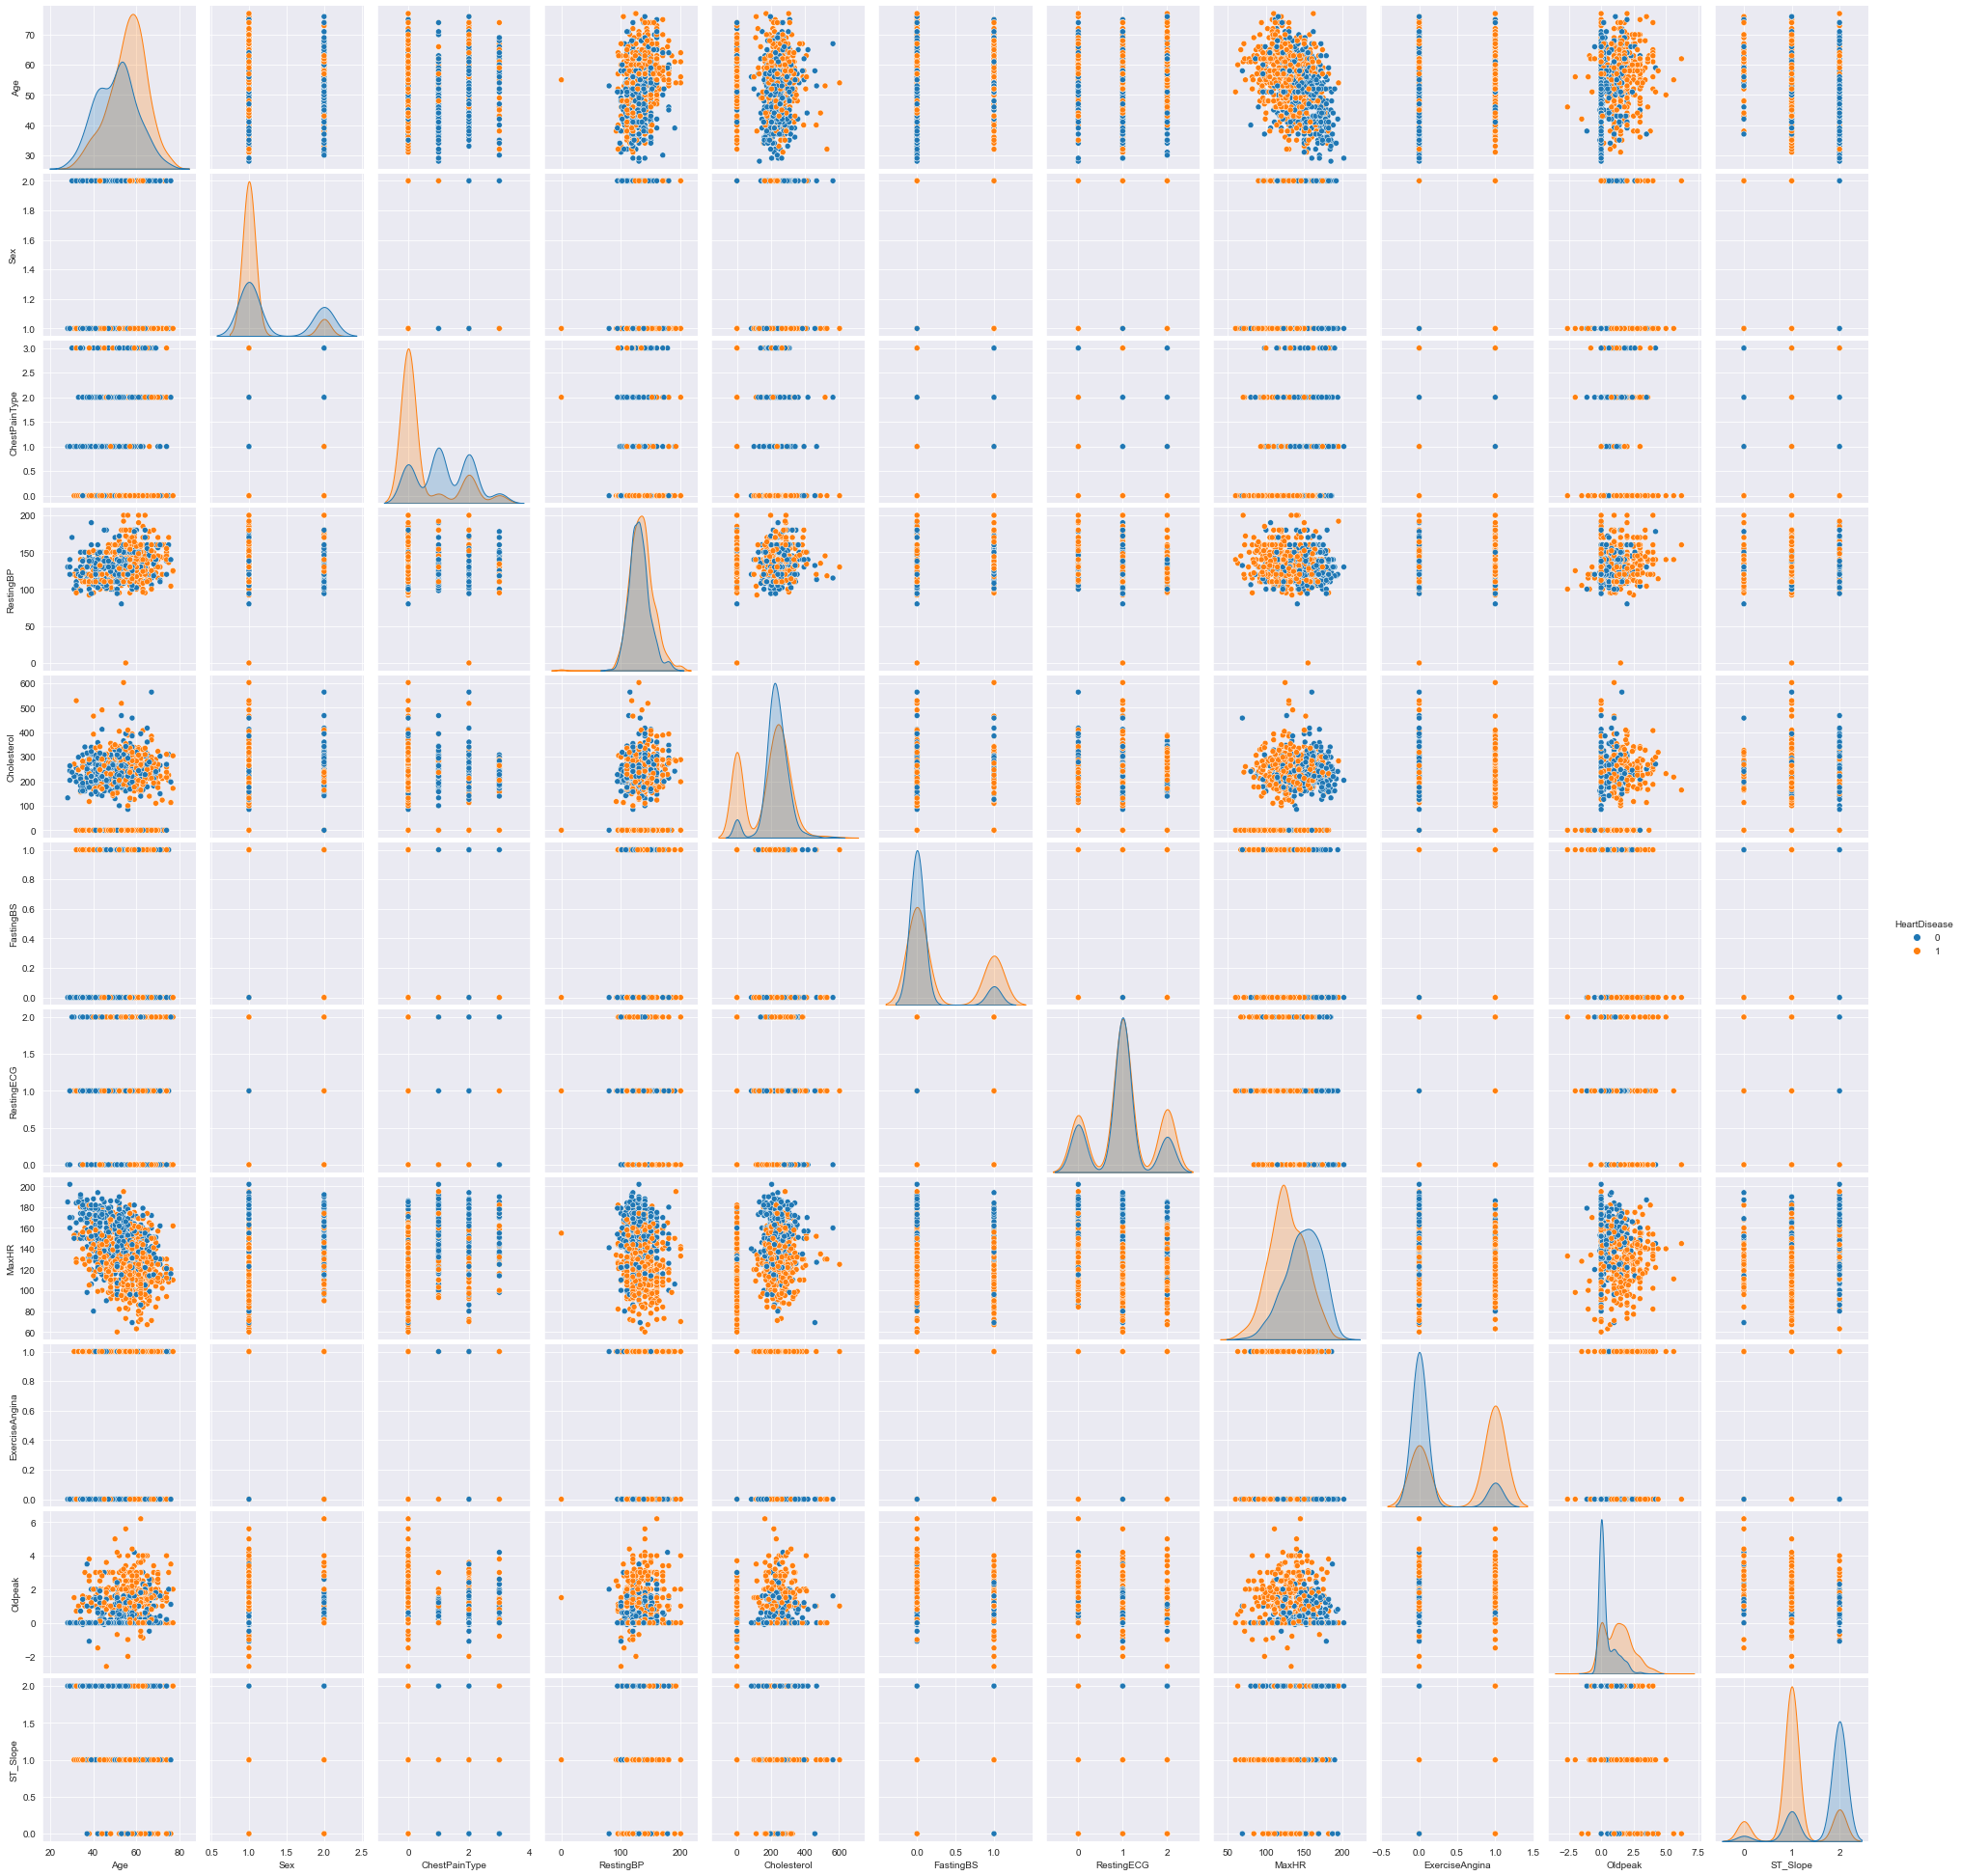

In [16]:
plt.figure(figsize=(1,1))
sns.pairplot(dt,hue="HeartDisease")
plt.show()

# 4. Podział danych oraz standaryzacja

In [17]:
x = dt.drop(['HeartDisease'],axis=1)
y = dt[['HeartDisease']]

In [18]:
print('Rozmiar zbioru x', x.shape)
print('Rozmiar zbioru y', y.shape)

Rozmiar zbioru x (918, 11)
Rozmiar zbioru y (918, 1)


W celu rozdzielenia na danych na zbiór treningowy oraz testowy zostanie użyta następująca funkcja :

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None), 

po użycie której podzielimy odpowiednio zbiór. Odpowiednia implementacja wymaga doboru następujących parametrów :

- test_size – Ten parametr decyduje o wymiarach informacji, które muszą być podzielone, ponieważ zbiór danych testowych, przy podaniu liczby 0.2 zbiór zostanie podzielony odpowiednio 80 % do 20 %,

- random_state – lcizba całkowita będąca ziarnem dla generatora liczb losowych podczas podziału.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [20]:
print("Wymiar zbioru x_train: ", x_train.shape)
print("Wymiar zbioru y_train: ", y_train.shape)
print("Wymiar zbioru x_test: ", x_test.shape)
print("Wymiar zbioru y_test: ", y_test.shape)

Wymiar zbioru x_train:  (734, 11)
Wymiar zbioru y_train:  (734, 1)
Wymiar zbioru x_test:  (184, 11)
Wymiar zbioru y_test:  (184, 1)


Standaryzacja danych do modeli machine learning polega na przekształceniu danych pierwotnych, aby ich rozkład miał średnią wartość równą 0 i odchylenie standardowe równe 1. Od każdej wartość w kolumnie danych będzie odejmowana średnia wartość kolumny, a następnie to co wyjdzie będzie podzielona przez odchylenie standardowe kolumny danych. Opisany proces dotyczy każdej kolumny oddzielnie. W celu stanadaryzacji zostanie użyta funkcja StandardScaler(), bez nadawania parametrów. 

In [21]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# 5. Trening modelu uczenia maszynowego

In [22]:
classifier_1 = GaussianNB()
classifier_2 = LinearDiscriminantAnalysis()
classifier_3 = GradientBoostingClassifier(n_estimators=100, learning_rate=1,max_depth=1, random_state=42)

### 5.1 Algorytm 1 - Gaussian Naive Bayes

Gaussian Naive Bayes zakłada, że cechy są niezależne. Oznacza to, że nadal zakładamy macierze kowariancji specyficzne dla klasy,ale macierze kowariancji są macierzami diagonalnymi. Wynika to z założenia, że funkcje są niezależne. Jest to model generatywny, a każda klasa w tym modelu podąża za rozkładem Gausa.

Funkcja class sklearn.naive_bayes.GaussianNB(*, priors=None, var_smoothing=1e-09), gdzie następujące parametry opisane są w następujący sposób:
- Priors – priorytetowe prawdopodobieństwo klas,

- Var_smoothing – część największej wariancji  dla wszystkich klas, dodawana w celu zapewnienia stabilności obliczeń.

In [23]:
start = time.time()
classifier_1.fit(x_train, y_train)
y_pred = classifier_1.predict(x_test)
y_prob = classifier_1.predict_proba(x_test)[:,1]
end = time.time()
print('Czas działania algorytmu',end - start, 's')

Czas działania algorytmu 0.0019965171813964844 s


Raport klasyfikacji classification_report() służy do pomiaru jakości prognoz na podstawie algorytmu klasyfikacji. Ile przewidywań jest prawdziwych, a ile fałszywych. Dokładniej, True Positives (Przypadek pozytywny/Przewidywany pozytywny), False Positives (Przypadek negatywny/Przewidywany pozytywny), True Negatives (Przypadek negatywny/Przewidywany negatywny) i False Negatives (Przypadek pozytywny/Przewidywany negatywny) są używane do przewidywania metryk raportu klasyfikacji. Możemy wyroźnić następujące miary :

- Skuteczność - metryka ta mówi nam o stosunku dobrze dokonanych klasyfikacji do ilości wszystkich dokonanych klasyfikacji,

- Precyzja - Precyzja to zdolność klasyfikatora do nieoznaczania instancji pozytywnie, która jest w rzeczywistości ujemna. Dla każdej klasy jest definiowany jako stosunek prawdziwych pozytywów do sumy prawdziwych i fałszywie dodatnich,

- Recall - Koncepcja stojąca za recall jest podobna do precision, dowiadujemy się z niej jednak ile obserwacji zgubiliśmy dla danej klasy,

- F1 – Średnia harmoniczna z precyzji i recall.

In [24]:
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

ROC AUC score: 0.9089695351377595


Tablica pomyłek confusion_matrix() jest stosowana przy ocenie jakości klasyfikacji binarnej (na dwie klasy). Dane oznaczone etykietami: pozytywną i negatywną poddawane są klasyfikacji, która przypisuje im predykowaną klasę pozytywną albo predykowaną klasę negatywną. Możliwa jest sytuacja, że dana oryginalnie oznaczona jako pozytywna zostanie omyłkowo zaklasyfikowana jako negatywną. Wszystkie takie sytuacje przedstawia tablica pomyłek.

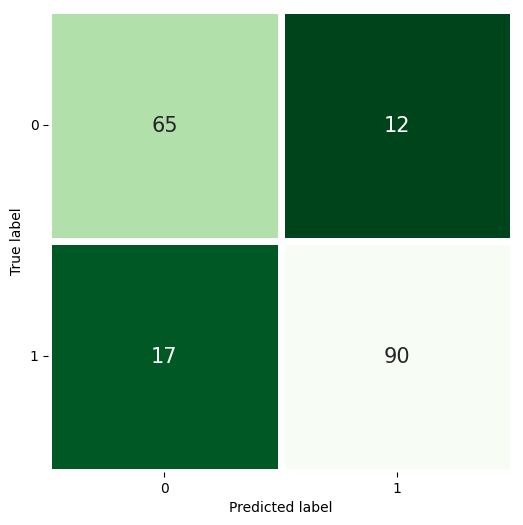

In [25]:
cm_1 = confusion_matrix(y_test, y_pred)
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize = (6, 6))
sns.heatmap(cm_1, cmap = 'Greens_r', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks(rotation = 0)
plt.show()

Krzywa oceny jakości klasyfikatora ROC AUC roc_curve() jest użyteczną metodą oceny dokładności predykcji modelu poprzez wykreślenie czułości wobec (1-swoistości) testu klasyfikacji (jako że wartość progowa różni się w całym zakresie wyników testu diagnostycznego). Całe pole pod daną krzywą ROC formułuje ważną statystykę, która odzwierciedla prawdopodobieństwo, że predykcja będzie zachowywać prawidłową kolejność po zaobserwowaniu zmiennej testowej. Im wykres ROC będzie bardziej ”wypukły”, tym lepszy klasyfikator.

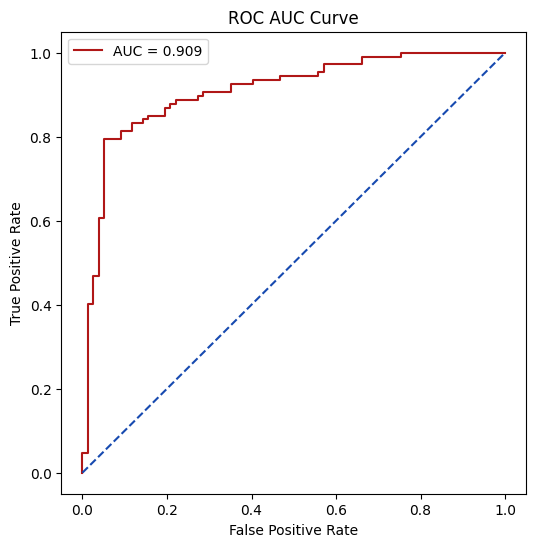

In [26]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

Krzywa precision-recall pokazuje zależność pomiędzy miarami precision i recall dla różnych wartości odcięcia klasyfikatora, wykreślamy ją dla wybranej klasy. Pokazuje ona nam ogólną zdolność klasyfikatora do rozpoznawania. Domyślnie w większości bibliotek rysowana jest dla klasy pozytywnej. Na osi X odkładamy policzone wartości recall a na osi Y precision dla wybranych progów.

<Figure size 600x600 with 0 Axes>

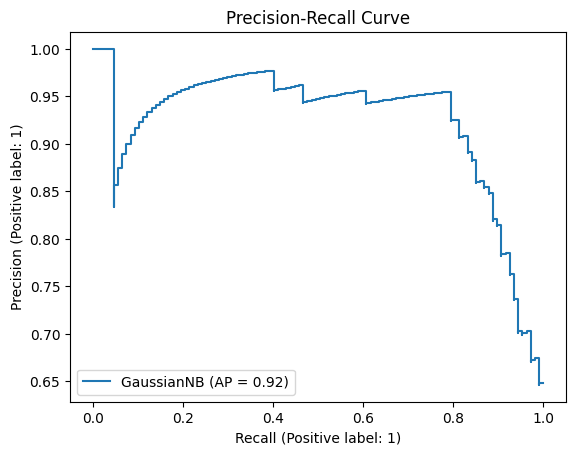

In [27]:
plt.figure(figsize = (6, 6))
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier_1, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

Krzywa uczenia się learning_curve() kreśli optymalną wartość funkcji strat modelu dla zestawu treningowego w stosunku do tej funkcji straty ocenianej na podstawie zestawu danych walidacji o tych samych parametrach, co wygenerowana optymalna funkcja. Jest to narzędzie, które pozwala dowiedzieć się, jak bardzo model maszyny korzysta z dodania większej ilości danych treningowych i czy estymator cierpi z powodu błędów. Jest ona przydatna do wielu celów, w tym do porównywania różnych algorytmów, wybierania parametrów modelu podczas projektowania, dostosowywania optymalizacji w celu poprawy konwergencji i określania ilości danych wykorzystywanych do szkolenia.

In [28]:
train_sizes, train_scores, test_scores = learning_curve(classifier_1, x, y, cv=10, scoring='accuracy', n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 5))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

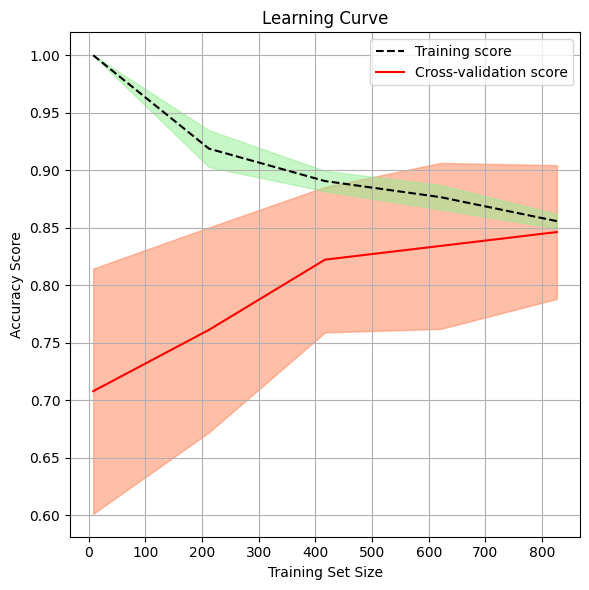

In [29]:
plt.subplots(1, figsize=(6,6))
plt.plot(train_sizes, train_mean, '--', color="black",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Cross-validation score")

plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,alpha=0.5, color="#FF7F50")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,alpha=0.5, color="#90EE90")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

### 5.2 Algorytm 2 - Linear Discriminant Analysis

Liniowa analiza dyskryminacyjna, w skrócie LDA, to algorytm uczenia maszynowego klasyfikacji.
Działa na zasadzie obliczania statystyk podsumowujących dla cech wejściowych według etykiety klasy, takich jak średnia i odchylenie standardowe. Te statystyki reprezentują model wyuczony z danych uczących. W praktyce operacje algebry liniowej służą do wydajnego obliczania wymaganych wielkości poprzez dekompozycję macierzy.
Prognozy są dokonywane poprzez oszacowanie prawdopodobieństwa, że nowy przykład należy do każdej etykiety klasy na podstawie wartości każdej cechy wejściowej. Klasa, która daje największe prawdopodobieństwo, jest następnie przypisywana do przykładu. Jako takie, LDA można uznać za proste zastosowanie twierdzenia Bayesa do klasyfikacji.
LDA zakłada, że zmienne wejściowe są numeryczne, mają rozkład normalny i mają tę samą wariancję (rozrzut). Jeśli tak nie jest, może być pożądane przekształcenie danych w celu uzyskania rozkładu Gaussa i standaryzacja lub normalizacja danych przed modelowaniem.

class sklearn.discriminant_analysis.LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001, covariance_estimator=None), gdzie wybrane następujące parametry opisane są w następujący sposób:

- solver – svd : rozkład wartości pojedynczej, lsqr : rozkład najmniejszych kwadratów, eigen : rozkład wartości własnych,

- Shrinkage – none : bez skurczu, auto : automatyczny skurcz Ledoit-Wolf, float: pomiędzy 0 a 1 (stały parametr skurczu),

- N_components – liczba składników do redukcji wymiarowości,
 
- Covariance_estimator – służy do oszacowania kowariancji, zamiast polegania na empirycznym estymatorze.



In [30]:
start = time.time()
classifier_2.fit(x_train, y_train)
y_pred = classifier_2.predict(x_test)
y_prob = classifier_2.predict_proba(x_test)[:,1]
end = time.time()
print('Czas działania algorytmu',end - start, 's')

Czas działania algorytmu 0.002990245819091797 s


In [31]:
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        77
           1       0.90      0.81      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

ROC AUC score: 0.9005947323704333


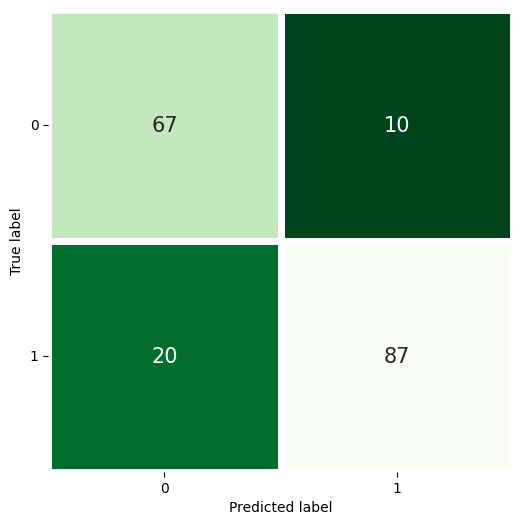

In [32]:
cm_2 = confusion_matrix(y_test, y_pred)
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize = (6, 6))
sns.heatmap(cm_2, cmap = 'Greens_r', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks(rotation = 0)
plt.show()

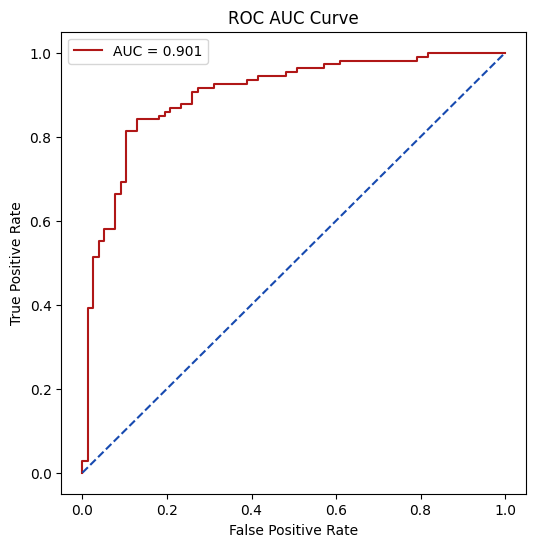

In [33]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

<Figure size 600x600 with 0 Axes>

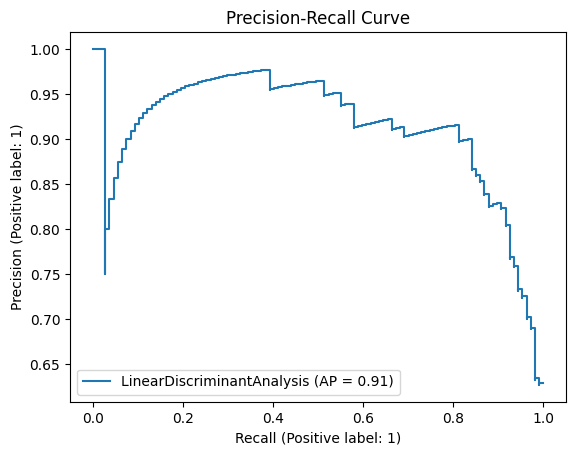

In [34]:
plt.figure(figsize = (6, 6))
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier_2, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

In [35]:
train_sizes, train_scores, test_scores = learning_curve(classifier_2, x, y, cv=10, scoring='accuracy', n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 5))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

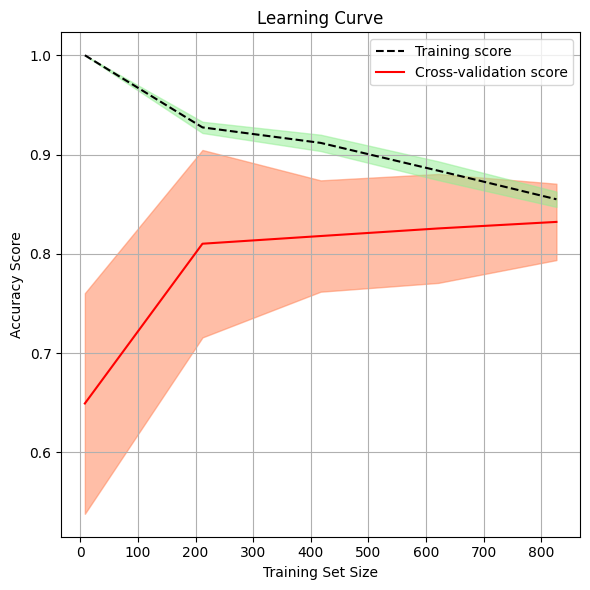

In [36]:
plt.subplots(1, figsize=(6,6))
plt.plot(train_sizes, train_mean, '--', color="black",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Cross-validation score")

plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,alpha=0.5, color="#FF7F50")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,alpha=0.5, color="#90EE90")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

### 5.3 Algorytm 3 - Gradient Boosting for classification

Gradient boosting to technika uczenia maszynowego stosowana między innymi w zadaniach regresji i klasyfikacji. Daje model predykcyjny w postaci zespołu słabych modeli predykcyjnych, które są zazwyczaj drzewami decyzyjnymi.  Gdy drzewo decyzyjne jest słabym uczniem, wynikowy algorytm nazywa się drzewami wzmocnionymi gradientem; zwykle przewyższa las losowy. Model drzew z gradientem jest zbudowany w sposób etapowy, podobnie jak w innych metodach zwiększania, ale uogólnia inne metody, umożliwiając optymalizację arbitralnej różniczkowalnej funkcji strat. 

class sklearn.ensemble.GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0), gdzie wybrane następujące parametry opisane są w następujący sposób:

- Learning_rate - Tempo uczenia się zmniejsza wkład każdego drzewa . Istnieje kompromis między learning_rate a n_estimators. Wartości muszą znajdować się w zakresie (0.0, inf),

- Max_depth - Maksymalna głębokość poszczególnych estymatorów regresji. Maksymalna głębokość ogranicza liczbę węzłów w drzewie.

In [37]:

start = time.time()
classifier_3.fit(x_train, y_train)
y_pred = classifier_3.predict(x_test)
y_prob = classifier_3.predict_proba(x_test)[:,1]
end = time.time()
print('Czas działania algorytmu',end - start, 's')

Czas działania algorytmu 0.12498021125793457 s


In [38]:
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')


              precision    recall  f1-score   support

           0       0.80      0.90      0.85        77
           1       0.92      0.84      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

ROC AUC score: 0.925233644859813


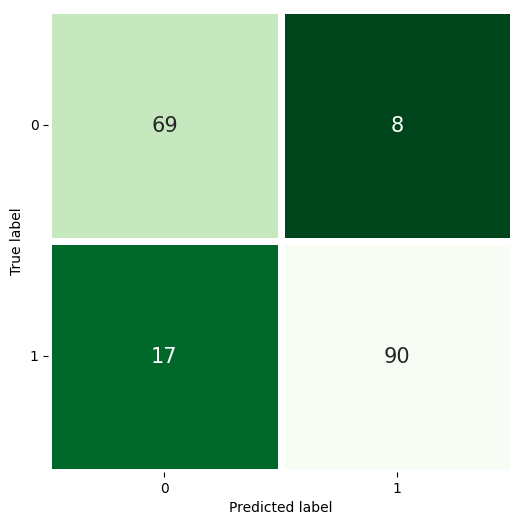

In [39]:
cm_3 = confusion_matrix(y_test, y_pred)
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize = (6, 6))
sns.heatmap(cm_3, cmap = 'Greens_r', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks(rotation = 0)
plt.show()

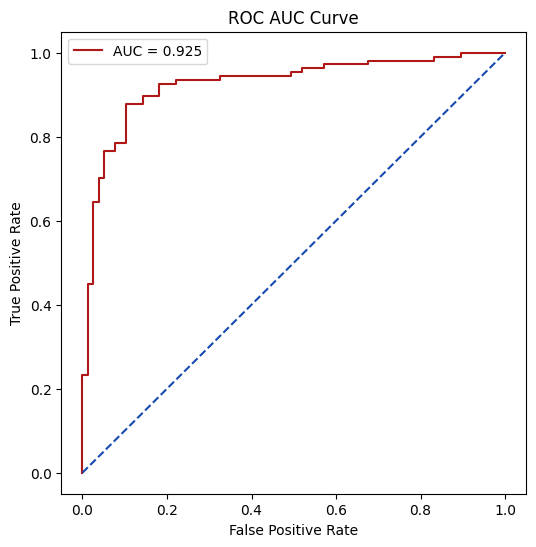

In [40]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

<Figure size 600x600 with 0 Axes>

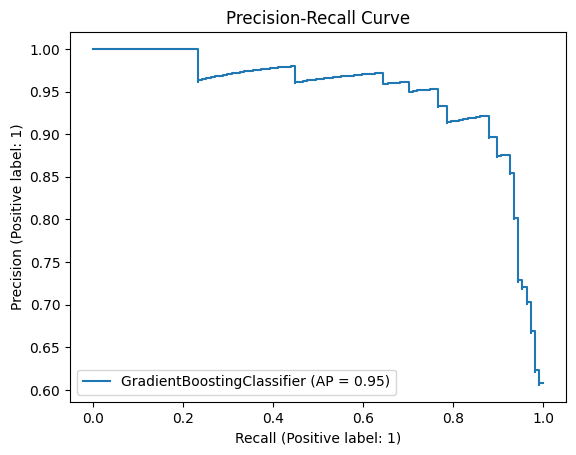

In [41]:
plt.figure(figsize = (6, 6))
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(classifier_3, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

In [42]:
train_sizes, train_scores, test_scores = learning_curve(classifier_3, x, y, cv=10, scoring='accuracy', n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 5))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

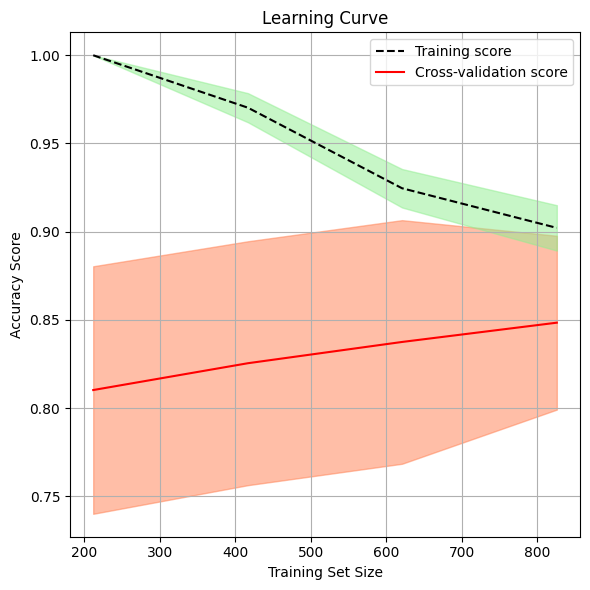

In [43]:
plt.subplots(1, figsize=(6,6))
plt.plot(train_sizes, train_mean, '--', color="black",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Cross-validation score")

plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,alpha=0.5, color="#FF7F50")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,alpha=0.5, color="#90EE90")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()

### 6.4 Skuteczności algorytmów

In [44]:
print('Skuteczność uczenia na zbiorze treningowym :')
print('- GaussianNB =',classifier_1.score(x_train,y_train)*100, '%')
print('- LDA =',classifier_2.score(x_train,y_train)*100, '%')
print('- GradientBoostingClassifier =',classifier_3.score(x_train,y_train)*100, '%')
print()
print('Skuteczność uczenia na zbiorze testowym :')
print('- GaussianNB =',classifier_1.score(x_test,y_test)*100, '%')
print('- LDA =',classifier_2.score(x_test,y_test)*100, '%')
print('- GradientBoostingClassifier =',classifier_3.score(x_test,y_test)*100, '%')

Skuteczność uczenia na zbiorze treningowym :
- GaussianNB = 86.37602179836512 %
- LDA = 85.55858310626702 %
- GradientBoostingClassifier = 89.64577656675749 %

Skuteczność uczenia na zbiorze testowym :
- GaussianNB = 84.23913043478261 %
- LDA = 83.69565217391305 %
- GradientBoostingClassifier = 86.41304347826086 %


# 7. Połączenie algorytmów - Voting Classifier

Ensembling to potężna technika poprawy wydajności modelu poprzez połączenie różnych modeli podstawowych w celu uzyskania optymalnego i solidnego modelu. Jednym z modelów jest klasyfikator głosowania, które jest estymatorem uczenia maszynowego, który trenuje różne modele bazowe lub estymatory i przewiduje na podstawie agregacji wyników każdego estymatora bazowego. Kryteria agregacji mogą być łączone z decyzją o głosowaniu dla każdego wyniku estymatora. Kryteria głosowania mogą być dwojakiego rodzaju:

- Twarde głosowanie: Głosowanie jest obliczane na podstawie przewidywanej klasy wyjściowej,

- Miękkie głosowanie: Głosowanie jest obliczane na podstawie przewidywanego prawdopodobieństwa klasy wyjściowej.

Klasyfikator głosów agreguje przewidywaną klasę lub przewidywane prawdopodobieństwo na podstawie głosowania twardego lub miękkiego. Jeśli więc podajemy różne modele bazowe do klasyfikatora głosowania, upewnia się, że błąd zostanie rozwiązany przez dowolny model.

class sklearn.ensemble.VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False), gdzie wybrane następujące parametry opisane są w następujący sposób:

- voting – umożliwia wybór głosowania,

- weight – sekwencja przydzielania wag przed głosowaniem,

- n_jobs – liczba zadań uruchamianych równolegle dla programu.


In [45]:
start = time.time()
eclf_1 = VotingClassifier(estimators=[('CL1', classifier_1), ('CL2', classifier_2), ('CL3', classifier_3)],
                        voting='soft', verbose = 1)
eclf_1.fit(x_train, y_train)    
eclf_2 = VotingClassifier(estimators=[('CL1', classifier_1), ('CL2', classifier_2), ('CL3', classifier_3)],
                        voting='soft')
eclf_2.fit(x_test, y_test)    
eclf_3 = VotingClassifier(estimators=[('CL1', classifier_1), ('CL2', classifier_2), ('CL3', classifier_3)],
                        voting='hard')
eclf_3.fit(x_train, y_train)
eclf_4 = VotingClassifier(estimators=[('CL1', classifier_1), ('CL2', classifier_2), ('CL3', classifier_3)],
                        voting='hard')
eclf_4.fit(x_test, y_test)  
end = time.time()
print('Czas działania algorytmu',end - start, 's')

[Voting] ...................... (1 of 3) Processing CL1, total=   0.0s
[Voting] ...................... (2 of 3) Processing CL2, total=   0.0s
[Voting] ...................... (3 of 3) Processing CL3, total=   0.1s
Czas działania algorytmu 0.32917022705078125 s


### 7.1 Skuteczność algorytmu Voting classifier

In [46]:
print('Skutecznośći uczenia - Voting Classifier :')
print('Voting Classifier Soft (zbior treningowy) =',eclf_1.score(x_train,y_train)*100, '%') 
print('Voting Classifier Soft (zbior testowy) =',eclf_2.score(x_test,y_test)*100, '%') 
print('Voting Classifier Hard (zbior treningowy) =',eclf_3.score(x_train,y_train)*100, '%') 
print('Voting Classifier Hard (zbior testowy) =',eclf_4.score(x_test,y_test)*100, '%') 

Skutecznośći uczenia - Voting Classifier :
Voting Classifier Soft (zbior treningowy) = 87.19346049046321 %
Voting Classifier Soft (zbior testowy) = 91.84782608695652 %
Voting Classifier Hard (zbior treningowy) = 86.92098092643052 %
Voting Classifier Hard (zbior testowy) = 89.67391304347827 %


In [50]:
eclf_1.fit(x_train, y_train)
y_pred = eclf_1.predict(x_test)
y_prob = eclf_1.predict_proba(x_test)[:,1]

[Voting] ...................... (1 of 3) Processing CL1, total=   0.0s
[Voting] ...................... (2 of 3) Processing CL2, total=   0.0s
[Voting] ...................... (3 of 3) Processing CL3, total=   0.1s


In [51]:
print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

ROC AUC score: 0.9198931909212282


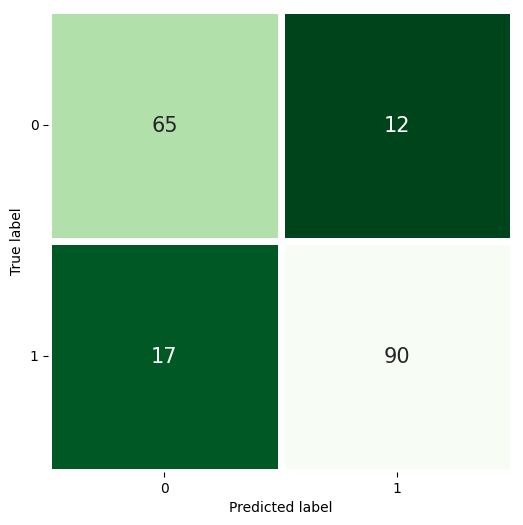

In [52]:
cm_5 = confusion_matrix(y_test, y_pred)
plt.rcParams.update(plt.rcParamsDefault)
plt.figure(figsize = (6, 6))
sns.heatmap(cm_1, cmap = 'Greens_r', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15})
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.yticks(rotation = 0)
plt.show()

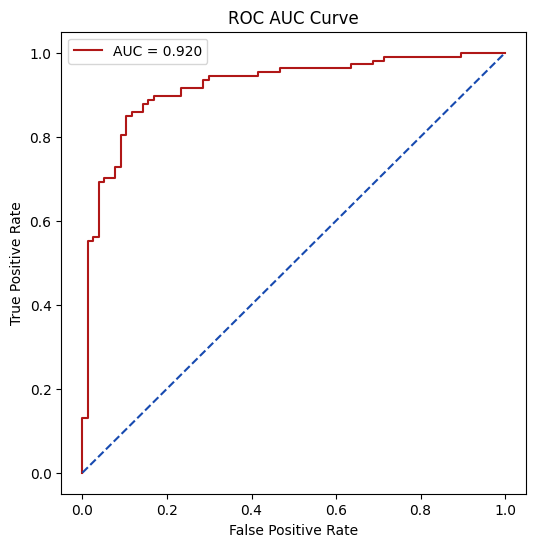

In [53]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.figure(figsize = (6, 6))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()

<Figure size 600x600 with 0 Axes>

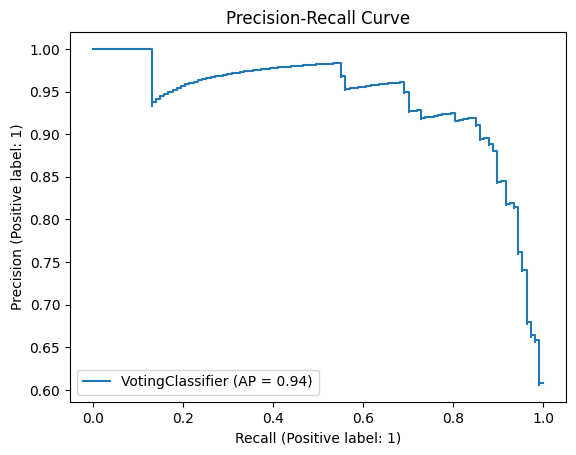

In [54]:
plt.figure(figsize = (6, 6))
average_precision = average_precision_score(y_test, y_prob)
disp = plot_precision_recall_curve(eclf_1, x_test, y_test)
plt.title('Precision-Recall Curve')
plt.show()

In [55]:
train_sizes, train_scores, test_scores = learning_curve(eclf_1, x, y, cv=10, scoring='accuracy', n_jobs=1, train_sizes=np.linspace(0.01, 1.0, 5))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

[Voting] ...................... (1 of 3) Processing CL1, total=   0.0s
[Voting] ...................... (2 of 3) Processing CL2, total=   0.0s
[Voting] ...................... (1 of 3) Processing CL1, total=   0.0s
[Voting] ...................... (2 of 3) Processing CL2, total=   0.0s
[Voting] ...................... (3 of 3) Processing CL3, total=   0.0s
[Voting] ...................... (1 of 3) Processing CL1, total=   0.0s
[Voting] ...................... (2 of 3) Processing CL2, total=   0.0s
[Voting] ...................... (3 of 3) Processing CL3, total=   0.1s
[Voting] ...................... (1 of 3) Processing CL1, total=   0.0s
[Voting] ...................... (2 of 3) Processing CL2, total=   0.0s
[Voting] ...................... (3 of 3) Processing CL3, total=   0.1s
[Voting] ...................... (1 of 3) Processing CL1, total=   0.0s
[Voting] ...................... (2 of 3) Processing CL2, total=   0.0s
[Voting] ...................... (3 of 3) Processing CL3, total=   0.2s
[Votin

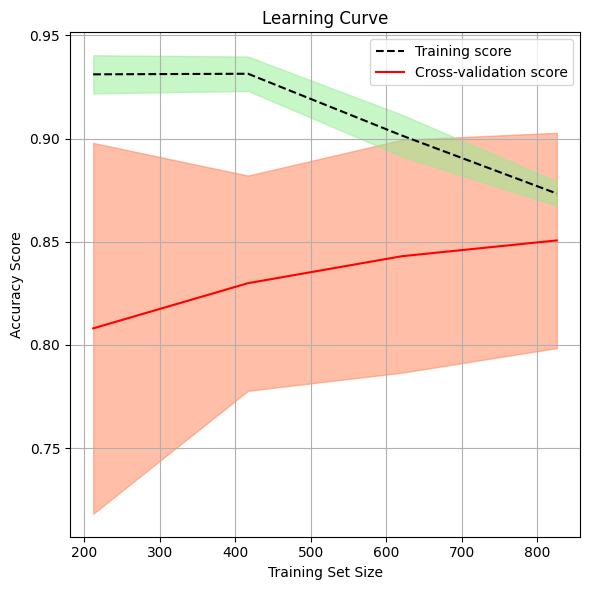

In [56]:
plt.subplots(1, figsize=(6,6))
plt.plot(train_sizes, train_mean, '--', color="black",  label="Training score")
plt.plot(train_sizes, test_mean, color="red", label="Cross-validation score")

plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std,alpha=0.5, color="#FF7F50")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,alpha=0.5, color="#90EE90")

plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.grid()
plt.show()